### Data Exploitation and Preprocessing

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [2]:
#load the dataset
iris = load_iris()
X, y = iris.data, iris.target

#split the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model Traning 

In [3]:
from sklearn.linear_model import LogisticRegression

#create and train the model

model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train) # this is where training happens model.fit

LogisticRegression(max_iter=200)

### Model Evaluation

In [4]:
from sklearn.metrics import accuracy_score

#predict the labels for the test set
y_pred = model.predict(X_test)

#calculate the accuracy of the predictions
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy: .2f}')

Accuracy:  1.00


### Make predictions

In [5]:
import numpy as np

#Sample new data( example)
new_samples = np.array([[5.1, 3.5, 1.4, 0.2], [6.7, 3.1, 4.7, 1.5]])
predictions = model.predict(new_samples)
print(f'Predicted species: {predictions}')

Predicted species: [0 1]


0 corresponds to the species Iris-setosa.
1 corresponds to the species Iris-versicolor.

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


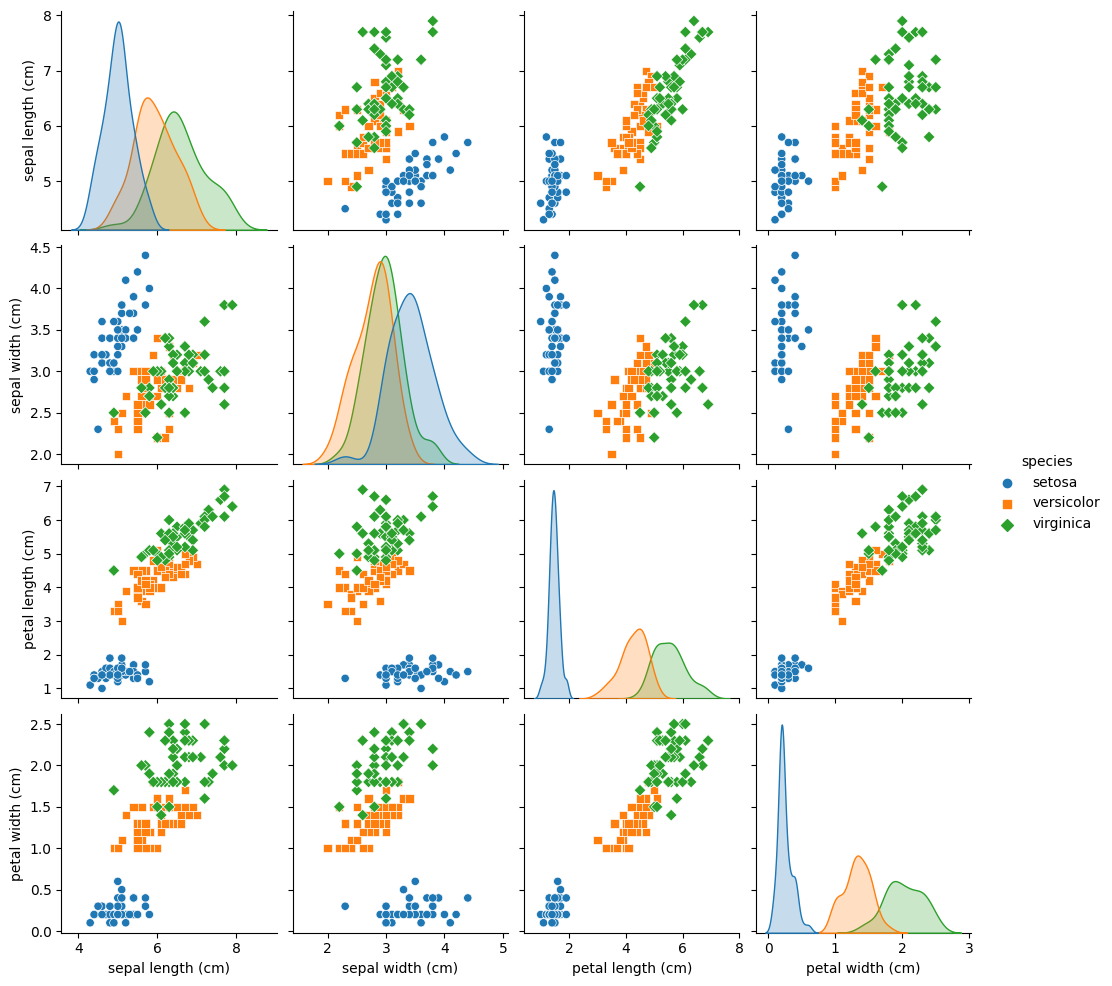

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target

# Map numerical species to actual names
species_map = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
iris_df['species'] = iris_df['species'].map(species_map)

# Create pairplot
sns.pairplot(iris_df, hue='species', markers=["o", "s", "D"])
plt.show()


### Unsupervised learning

In [7]:
from sklearn.cluster import KMeans

# Create a KMeans instance with 3 clusters and fit it
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Get the cluster assignments for each data point
clusters = kmeans.labels_


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


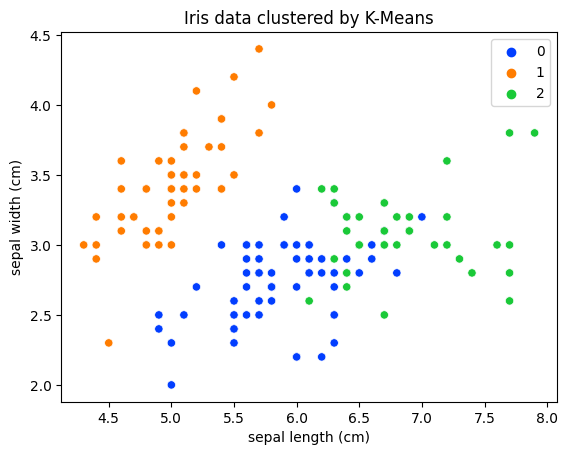

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting just the first two dimensions of X
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=clusters, palette='bright')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title("Iris data clustered by K-Means")
plt.show()


In [9]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming we assign cluster 0 to species 0, 1 to 1, and 2 to 2 for simplicity
# Note: This mapping might not be direct, you may need to adjust based on your cluster results
predicted_labels = clusters

# Print a classification report
print(classification_report(iris.target, predicted_labels))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.00      0.00      0.00        50
           2       0.95      0.72      0.82        50

    accuracy                           0.24       150
   macro avg       0.32      0.24      0.27       150
weighted avg       0.32      0.24      0.27       150

